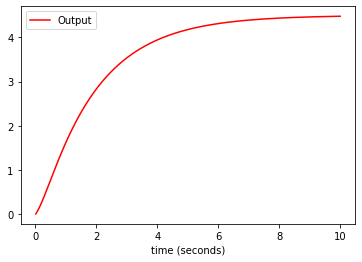

In [1]:
import sys
sys.path.append("../../")
import time

from lib.data.dataplot import *
from lib.utils.time import *

class S1:
    
    def __init__(self):
        self.x1 = 0
        self.x2 = 0
        
    def evaluate(self, delta_t, _input):
        new_x2 = self.x2 * (1 - delta_t * 4) - 2 * self.x1 * delta_t + 5 * _input * delta_t
        new_x1 = self.x1 + delta_t * self.x2
        
        self.x1 = new_x1
        self.x2 = new_x2
        
        return self.x1
        

class S2:

    def __init__(self):
        self.y = 0

    def evaluate(self, delta_t, _input):
        self.y = self.y * (1 - 0.5*delta_t) + _input * delta_t
        return self.y
    

class CompoundSystem:
    
    def __init__(self):
        self.s1 = S1()
        self.s2 = S2()
        
    def evaluate(self, delta_t, _input):
        out_s1 = self.s1.evaluate(delta_t, _input)
        out_s2 = self.s2.evaluate(delta_t, _input)
        return out_s1 + out_s2

dp = DataPlotter()
dp.set_x("time (seconds)")
dp.add_y("out", "Output")

s = CompoundSystem()
u = 1

t = Time()
t.start()
while t.get() < 10:

    time.sleep(0.01)
    delta_t = t.elapsed()
    
    y = s.evaluate(delta_t, u)
    
    dp.append_x(t.get())
    dp.append_y("out", y)

dp.plot()